In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


Unlike in the classification and regression in the unsupervised learning we just have the data not like input data and the output data things.
 
- Values which are grouped together called as cluster.
- K-means cluster.
- According to the feature similarities the cluster would have been decided and grouped together (certain amount of the data based on the similarity of the features).

- K is the number of clusters.
- based on the node position. The distane from the cluster mean it should be minimum.(Mean from the centre is minimized).
- The centroid of the particular cluster is the cordinate of the points.

STEPS
1. Take any two points in the random clusters we taken.
2. We will check the points where they resides in cluster 1 or cluster 2 by using the distance formula.
3. We will use the distance formula for the each of the datapoints and then decide where the point is residing where the distance is less towards the centroid of the cluster.
4. Where points have added in the cluster. Then also the centroid will also chnange becasue the area has been extended. We need to shift the centroid, by taking the average of the points.

In [2]:
### Lets import the required libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# we will remove the customer ID hence we have the index as well 
# we are not using the algorithm as we are not using the customer id or some sort of ID's or some sort of names
# We will also ignore the gender and age for the simplicity purpose 

# this will be our input 
X = df.iloc[:,[3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


We will use the Elbow methos for deciding the number of clusters 
- The maximum number of possible clusters taken as square root of total number of datapoints.
- For example we have the 200 datapoints and we have the square root as 14 hence we can take the n_clusters between the 1-14.


In [5]:
np.sqrt(200)

14.142135623730951

In [6]:
K=range(0,14)

In [7]:
from sklearn.cluster import KMeans

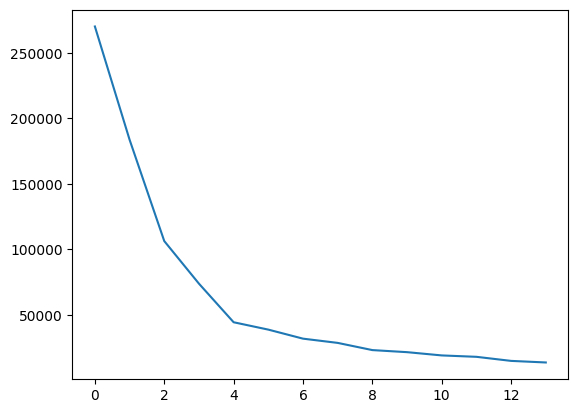

In [8]:
k=range(1,15)

SSE = []
for i in k:
    model_clusters=KMeans(n_clusters=i,random_state=14,n_init='auto')
    model_clusters.fit(X)
    SSE.append(model_clusters.inertia_)# sum of squared errors 

plt.plot(K,SSE)
plt.show()
# here the code will run untill the value reaches 14.
# inertia gives the sum of squared distance of samples to their closest cluster center,
# weighted by the sample weights if provided.

There are two points where we can see that the elbow is very prominent where the k value is equal to 5.
- The number of clusters is being 5 the value is very predominant and K=5clsuters
- Hence we will decide 5 to be the most appropriate number of clusters.
- ideally the graph should be decreasing downwards and we will get the sharp elbow.

In [9]:
# we can also decide the random number between 1-14 for the value of clusters.
# but the elbow method is preferrable way to decide the number of clusters.

In [10]:
# now we will fit the model
model = KMeans(n_clusters=5, random_state=14, n_init='auto')
# random state is like the random seed in numpy 

In [11]:
model.fit(X)

KMeans(n_clusters=5, n_init='auto', random_state=14)

In [12]:
model.predict(X)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

- here are the random bunch of values 
- We will get the 200 values which are listed. These values are the cluster numbers. from 0 to 4.
- Becasue there are 5 clusters.


In [13]:
# we will add the new column to the dataframe.
df['Cluster_no']=model.predict(X)

In [14]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_no
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [15]:
# visulaization plays very important role in the clustering 

y = model.predict(X)

In [16]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([81, 39, 22, 35, 23]))

In [17]:
# (array([0, 1, 2, 3, 4], dtype=int32), array([81, 39, 22, 35, 23]))
# There are 81 datapoints in cluster 0.
# There are 39 datapoints in cluster 1.
# There are 22 datapoints in cluster 2.
# There are 35 datapoints in cluster 3.
# There are 23 datapoints in cluster 4.

In [18]:
X[y==2]# all the datapoints belonging to cluster number 0.



,Annual Income (k$),Spending Score (1-100)
1,15,81
3,16,77
5,17,76
7,18,94
9,19,72
11,19,99
13,20,77
15,20,79
17,21,66
19,23,98


In [19]:
cluster_2=X[y==2].values
cluster_0=X[y==0].values
cluster_1=X[y==1].values
cluster_3=X[y==3].values 
cluster_4=X[y==4].values 


In [20]:
cluster_2[:,0]
# anuual income for datapoints in the cluster 2 

cluster_2[:,1]
#spending score for datapoints in the cluster 2

# annual income and spending score for cluster 0 
cluster_0[:,0]
cluster_0[:,1]

# annual income and spending score for cluster 1
cluster_1[:,0]
cluster_1[:,1]

# annual income and spending score for cluster 3
cluster_3[:,0]
cluster_3[:,1]

# annual income and spending score for cluster 4
cluster_4[:,0]
cluster_4[:,1]


array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28])

- Now we will plot the annual income vs spending score for the cluster 2.

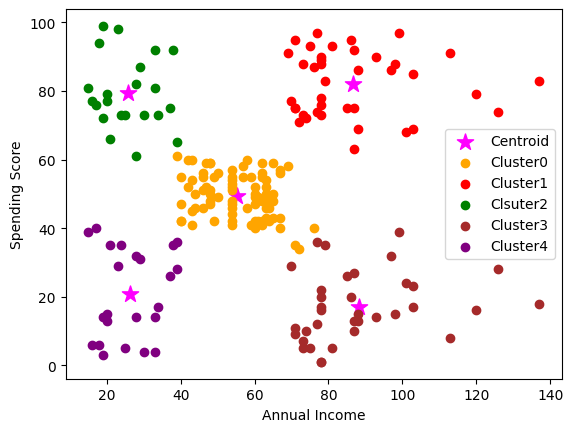

In [21]:
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],color='magenta',marker='*',s=150,label='Centroid')
plt.scatter(cluster_0[:,0],cluster_0[:,1],color='orange',label='Cluster0')
plt.scatter(cluster_1[:,0],cluster_1[:,1],color='red',label='Cluster1')
plt.scatter(cluster_2[:,0],cluster_2[:,1],color='green',label='Clsuter2')
plt.scatter(cluster_3[:,0],cluster_3[:,1],color='brown',label='Cluster3')
plt.scatter(cluster_4[:,0],cluster_4[:,1],color='purple',label='Cluster4')
plt.legend()
plt.xlabel("Annual Income")
plt.ylabel('Spending Score')
plt.show()

We get the very important approach by clustering analysis:
- Cluster_0 constitutes the majority of people. Regular chunk of people who are spending average and having the annual income average also.

- Cluster_1 people have the very high annual income and they are also spending lot. These are like gold standard cuctomers. We need to give them special access.

- Clsuter_2 people having the low annual icome but the very high spending score hence these customers are bonus customers. 

- Cluster_3 are customers having the annual income very high but they didn't spend to much. 

- Cluster_4 customers having the very less annual income as well as they spend very less on the sales.